In [1]:
import xarray as xr
import pyproj
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cmocean as cmo
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import numpy as np
import copy

In [2]:
ds = xr.open_dataset('../data/ecefiles/runoff_maps.nc')
lon = ds.lon.values
lat = ds.lat.values
lons,lats = np.meshgrid(lon,lat)

ds2 = xr.open_dataset('../data/inputfiles/runoff_maps.nc')

In [3]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 9
mpl.rcParams['axes.labelsize'] = 9
mpl.rcParams['legend.fontsize'] = 9

mpl.rcParams['figure.subplot.wspace'] = .02
mpl.rcParams['figure.subplot.hspace'] = .1
mpl.rcParams['figure.subplot.left'] = .01
mpl.rcParams['figure.subplot.right'] = .99
mpl.rcParams['figure.subplot.top'] = .95
mpl.rcParams['figure.subplot.bottom'] = .01
mpl.rcParams['figure.figsize'] = (5,5)


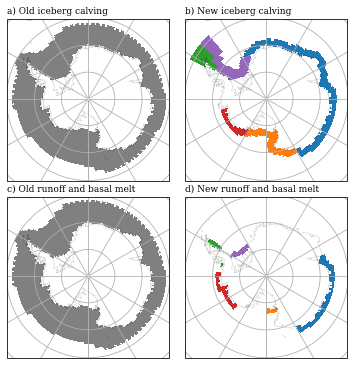

In [11]:
#Plot old and new masks

proj = ccrs.SouthPolarStereo()
#cmap = plt.get_cmap('tab10',10)
cmap = ListedColormap(["tab:purple", "tab:orange", "tab:blue", "tab:red","tab:green"])
cmap.set_under('w')
cmap.set_over('.5')

titles = ['a) Old iceberg calving','b) New iceberg calving','c) Old runoff and basal melt','d) New runoff and basal melt']

fig = plt.figure()

for v,vv in enumerate([ds['calving_point_id'],ds2['calving_point_id'],ds['arrival_point_id'],ds2['arrival_point_id']]):
    ax = fig.add_subplot(2,2,v+1,projection=proj)
    ax.set_extent([-180,180, -90, -60], crs=ccrs.PlateCarree())
    if v in [0,2]: vv += 5 #Move out of range
    im = ax.pcolormesh(lon,lat,vv,shading='auto',cmap=cmap,transform=ccrs.PlateCarree(),vmin=65.5,vmax=70.5)
    ax.coastlines(lw=.1)

    gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=False)
    gl.xlocator = mticker.FixedLocator(np.arange(-180,210,30))
    gl.xformatter = LONGITUDE_FORMATTER
    ax.set_title(titles[v],loc='left')
    
plt.savefig(f'../draftfigs/masks.png',dpi=450)
plt.show()

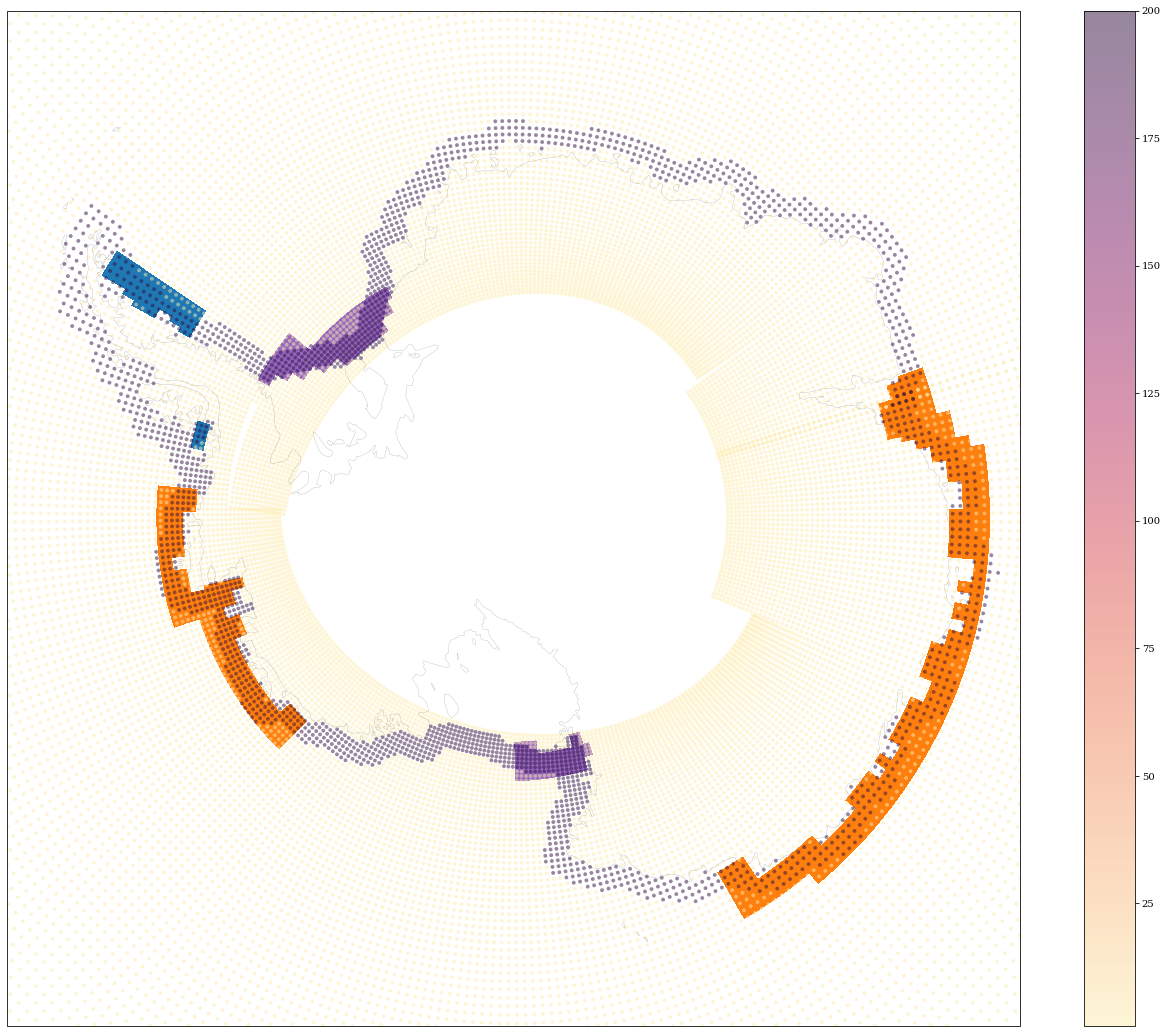

In [6]:
proj = ccrs.SouthPolarStereo()
fig = fig = plt.figure(figsize=(18,15))

ax = fig.add_subplot(111,projection=proj)
ax.set_extent([-180,180, -90, -63], crs=ccrs.PlateCarree())
im = ax.pcolormesh(lon,lat,ds2['arrival_point_id'],shading='auto',cmap=cmap,transform=ccrs.PlateCarree(),vmin=65.5,vmax=75.5)
ax.coastlines(lw=.1)


ds = xr.open_dataset('../data/inputfiles/runoff_depth.nc')
dep = ds['rodepth'][0,:,:]
llon = ds['nav_lon'][:]
llat = ds['nav_lat'][:]

ccmap = copy.copy(mpl.cm.get_cmap("cmo.matter"));
ccmap.set_under('w')
ccmap.set_bad('w')

im = ax.scatter(llon,llat,15,c=dep,cmap=ccmap,transform=ccrs.PlateCarree(),lw=0,alpha=.5)
plt.colorbar(im)
plt.show()